In [1]:
%matplotlib widget
import model
import matplotlib.pyplot as plt
import numpy as np
import brian2

# Only use this if you want to simulate giant networks for a long time N>10^6, t>200,
# and have a NVIDIA GPU
# # Enable GPU usage via Brian2CUDA, see https://github.com/brian-team/brian2cuda
# import brian2cuda
# brian2.set_device("cuda_standalone")

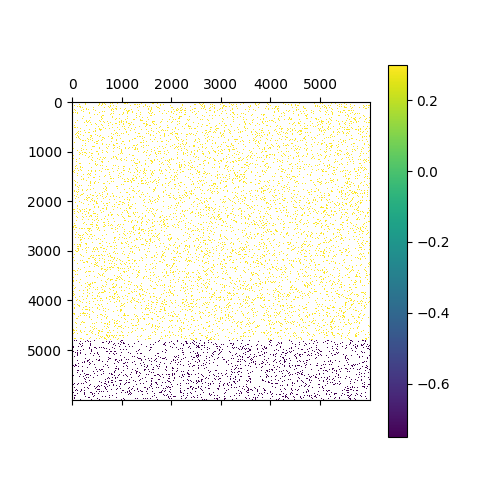

In [ ]:
import random
seed = 0
random.seed(seed)
np.random.seed(seed)

from brian2 import ms, mV, uA, cm

N=6000

synapticWeight = 0.35
fInhibition = 2.5

wE = synapticWeight
wI = -fInhibition*synapticWeight

net = model.Model(N, 0.8, params={"poisson_step": 3 * mV}, pPoisson=0.5, pEE=0.1, wEE=wE, pEI=0.1, wEI=wE, pIE=0.1, wIE=wI, pII=0.1, wII=wI, binary = True)

# Create a matrix to store the weights and fill it with NaN
connmat = np.full((N, N), np.nan)
# Insert the values from the Synapses object
connmat[net.synapses.i[:], net.synapses.j[:]] = net.synapses.w[:]
# plt.figure(1)
plt.matshow(connmat)
plt.colorbar()


In [3]:
net.run(1000 * ms)

# net.neurons.E_Na = 45 * mV
# net.run(1500 * ms)

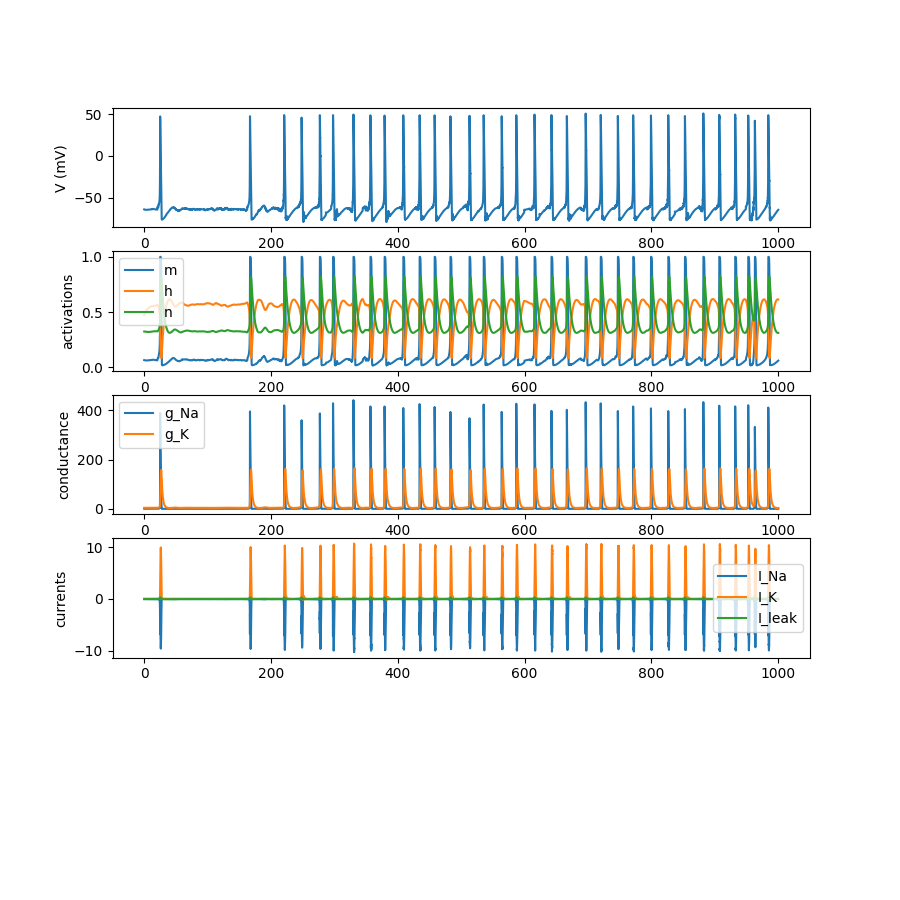

In [4]:
plt.figure(None, figsize=[9,9], dpi=100)

plt.subplot(5,1,1)
plt.plot(net.statemon.t/ms, net.statemon.v[0]/mV)
plt.ylabel('V (mV)')

plt.subplot(5,1,2)
plt.plot(net.statemon.t/ms, net.statemon.m[0], label ='m')
plt.plot(net.statemon.t/ms, net.statemon.h[0], label ='h')
plt.plot(net.statemon.t/ms, net.statemon.n[0], label ='n')
plt.ylabel('activations')
plt.legend(['m','h','n'])

plt.subplot(5,1,3)
plt.plot(net.statemon.t/ms, net.statemon.g_Na[0])
plt.plot(net.statemon.t/ms, net.statemon.g_K[0])
plt.ylabel('conductance')
plt.legend(['g_Na', 'g_K'])

plt.subplot(5,1,4)
plt.plot(net.statemon.t/ms, net.statemon.I_Na[0])
plt.plot(net.statemon.t/ms, net.statemon.I_K[0])
plt.plot(net.statemon.t/ms, net.statemon.I_leak[0])
plt.ylabel('currents')
plt.legend(['I_Na', 'I_K', 'I_leak'])
plt.show()

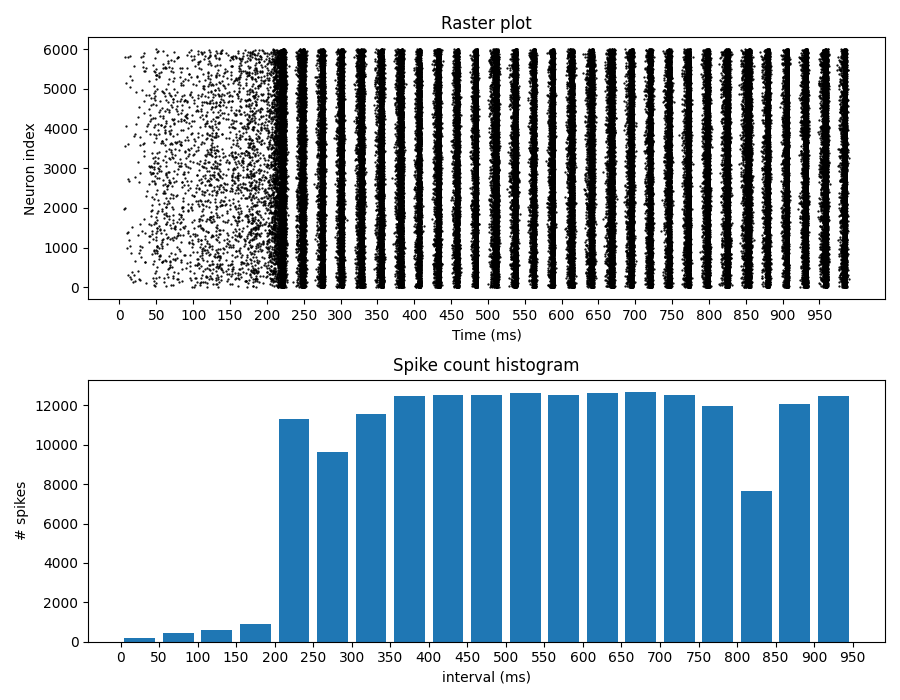

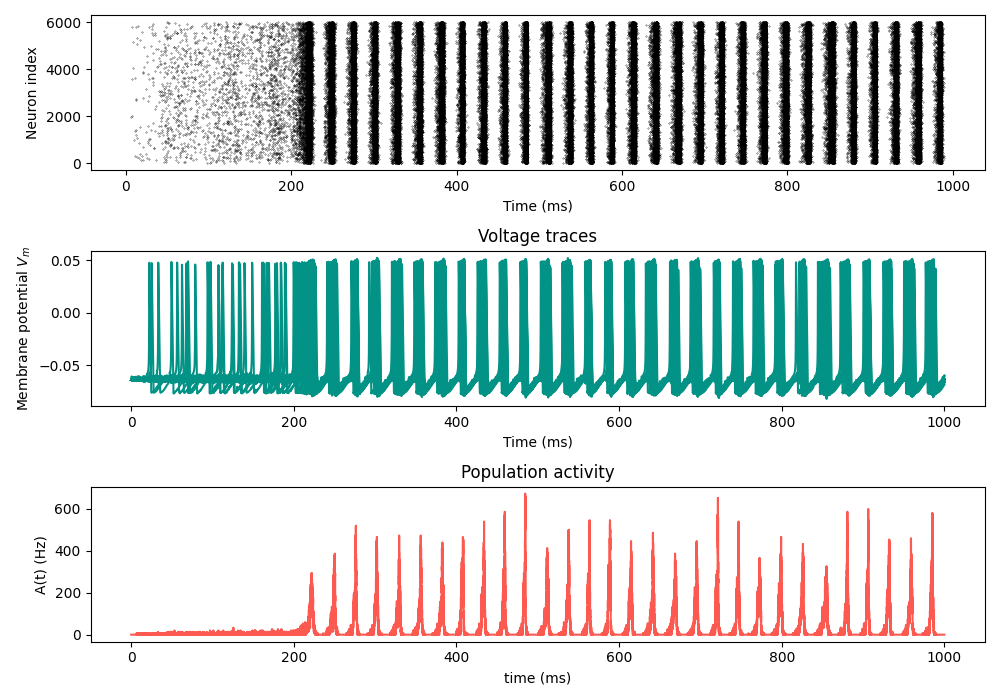

In [5]:
# spike count histogram
bins = 20 # choose the number of time bins you want
bin_time = net.runtime/bins/ms # time of one bin
spike_times = net.spikemon.t/ms # get spike times
intervals = list(range(0, int(net.runtime/ms), int(bin_time))) # the bins

plt.figure(3, figsize=[9,7], dpi=100)
plt.subplot(211)
plt.title('Raster plot')

plt.plot(net.spikemon.t/ms, net.spikemon.i, '.k', ms=1.2) # spikemon.i retrieves all neurons
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.xticks(intervals)

plt.subplot(212)
plt.title('Spike count histogram')
plt.hist(spike_times, bins=intervals, rwidth=0.8)
plt.xticks(intervals)
plt.xlabel('interval (ms)')
plt.ylabel('# spikes')
plt.tight_layout()
plt.show()

plt.figure(4, figsize=[10,7], dpi=100)

plt.subplot(3,1,1)
plt.plot(net.spikemon.t/ms, net.spikemon.i, '.k', ms=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')

plt.subplot(3,1,2)
plt.title('Voltage traces')
plt.plot(net.statemon.t/ms, net.statemon.v.T, color='xkcd:teal')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential $V_m$')

plt.subplot(3,1,3)
plt.title('Population activity')
plt.plot(net.popmon.t/ms, net.popmon.rate, color='xkcd:coral')
plt.xlabel('time (ms)')
plt.ylabel('A(t) (Hz)')
plt.tight_layout()